<a href="https://colab.research.google.com/github/mikiya2014/My-projects/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Findings

Lifestage: 

1. Older single/couples have the highest sales, new families have the lowest sales. Older single/couples have the largest customer counts, new families have the smallest ones. It can be the reason that most of the sales are coming from older singles/couples.
2. On average, customers of OLDER FAMILIES purchase the most chips, and those of YOUNG SINGLES/COUPLES purchase the least chips.
3. OLDER SINGLES/COUPLES and RETIREES have a little higher sales on average than other lifestages.

Premium customer:

1. Mainstream customers have the highest sales, premium customers have the lowest sales.Mainstream customers have the largest counts, premium customers have the smallest counts. It can be the reason that most of the sales are coming from mainstream customers.
2. On average, customers of BUDGET purchase the most chips, and those of MAINSTREAM purchase the least chips. Overall they are pretty close.

Life stage-Premium customer:

1. Olderfamilies-Budget customers have the highest sales, New families-Premium customers have the lowest sales.
2. On average, customers of OLDER FAMILIES-Mainstream purchase the most chips, and those of YOUNG SINGLES/COUPLES-Budget purchase the least chips. Again, customer counts of each segment highly correlated with sales.
3. There is a obvious difference seen, older families have the largest purchase of all customer types, then young families follows them. Both above 3.5. Other segments have reletively lower purchase around 2.5 to 3.2.It can be conclude that older families and young families are most targeted customers.

Packsize and brand:

1. Size of 175g have the highest sales, and one of 160 have the lowest sales. Looks like medium size is most popular.
2. Smith and Doritos have the highest sales, they are the most popular brands of chips. French have the lowest sales.

Timeseries:

1. There is a peak of sales at the end of 2018, the most possible explanation can be the impact of Christmas which is usual for retails.
2. There are two low points in 08/2018 and 05/2019. Other information should be provided and considered for the explanation.




In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns

## Read data from goodle drive 

In [2]:
df_behavior=pd.read_csv(
    '/content/drive/MyDrive/Quantium Project/QVI_purchase_behaviour.csv')
df_trans=pd.read_excel(
    '/content/drive/MyDrive/Quantium Project/QVI_transaction_data.xlsx')

## Creating and interpreting high level summaries of the data

### QVI_purchase_behaviour

In [3]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
null_behavior = df_behavior[df_behavior.isnull().any(axis=1)]
null_behavior
#There is no missing value of the behavior data.


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [5]:
dic_behavior={'Lifestage types':df_behavior['LIFESTAGE'].unique(),
              'Customer type':df_behavior['PREMIUM_CUSTOMER'].unique()}
print(dic_behavior)

#The data dictionary presents the unique values for LIFESTAGE and PREMIUM_CUSTOMER.
#LIFESTAGE have values of: YOUNG SINGLES/COUPLES, MIDAGE SINGLES/COUPLES, OLDER SINGLES/COUPLES,
#NEW FAMILIES, YOUNG FAMILIES,OLDER FAMILIES.
#PREMIUM_CUSTOMER have values of: Premium, Mainstream, Budget.
#The data dictionary indicates there is no incorrect value in these two columns.

{'Lifestage types': array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object), 'Customer type': array(['Premium', 'Mainstream', 'Budget'], dtype=object)}


In [6]:
with pd.option_context('float_format', '{:f}'.format): 
  print(df_behavior['LYLTY_CARD_NBR'].describe())
print({type(i) for i in df_behavior['LYLTY_CARD_NBR'].values})
#The LYLTY_CARD_NBR column represents the id number of customers' membership.
#Based on the statistical summary, the id number ranges from 1000 to 2373711.
#The column only contains integers as the id number.
#With no other data provided, this column looks fine.

count     72637.000000
mean     136185.931770
std       89892.932014
min        1000.000000
25%       66202.000000
50%      134040.000000
75%      203375.000000
max     2373711.000000
Name: LYLTY_CARD_NBR, dtype: float64
{<class 'numpy.int64'>}


### QVI_transaction_data

In [7]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
null_trans = df_trans[df_trans.isnull().any(axis=1)]
print(null_trans)
#There is no missing value of the transaction data.

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [9]:
store_number=sorted(df_trans['STORE_NBR'].unique())
product_nbr=pd.DataFrame(sorted(df_trans['PROD_NBR'].unique()),
                         columns=['Product_number'])
product_name=pd.DataFrame(sorted(df_trans['PROD_NAME'].unique()),
                          columns=['Product_name'])
print(min(store_number),max(store_number))
#There are 272 stores.
print(len(store_number))
print(len(product_nbr))
#There are 114 products according to product number.
print(len(product_name))
#There are 114 products acoording to product name which matches with number.

1 272
272
114
114


In [10]:
pd.set_option('float_format', '{:.2f}'.format)
df_trans[['DATE','LYLTY_CARD_NBR', 'TXN_ID','PROD_QTY','TOT_SALES']].describe()
# DATE ranges from 43282(7/1/2018) to 43646(6/30/2019) which is fine.
# LYLTY_CARD_NBR is the same with the behavior data.
# TXN_ID ranges from 1 to 2415841 which is fine without any information provided.
# PROD_QTY and TOT_SALES are quantities and need further exploration.

,DATE,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00
mean,43464.04,135549.48,135158.31,1.91,7.30
std,105.39,80579.98,78133.03,0.64,3.08
min,43282.00,1000.00,1.00,1.00,1.50
25%,43373.00,70021.00,67601.50,2.00,5.40
50%,43464.00,130357.50,135137.50,2.00,7.40
75%,43555.00,203094.25,202701.25,2.00,9.20
max,43646.00,2373711.00,2415841.00,200.00,650.00


In [11]:
# These columns must be integers as they are date, ids and quantities.
print({type(i) for i in df_trans['DATE'].values})
print({type(i) for i in df_trans['LYLTY_CARD_NBR'].values})
print({type(i) for i in df_trans['TXN_ID'].values})
print({type(i) for i in df_trans['PROD_QTY'].values})

{<class 'numpy.int64'>}
{<class 'numpy.int64'>}
{<class 'numpy.int64'>}
{<class 'numpy.int64'>}


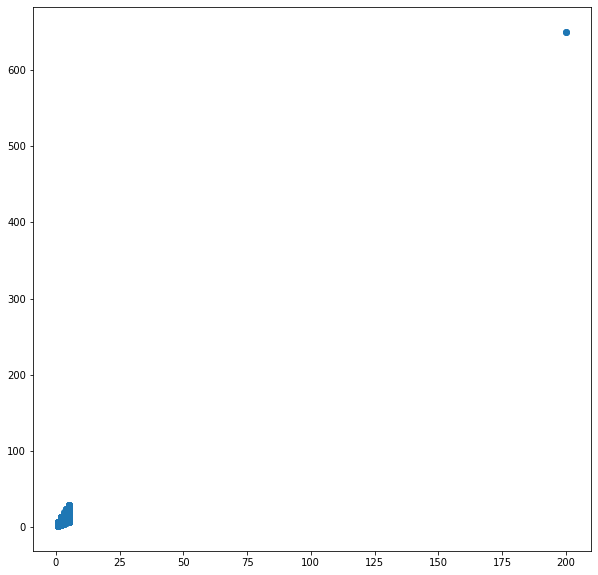

In [12]:
# Scatter plot of PROD_QTY and TOT_SALES to detect outliers.
plt.figure(figsize=(10,10))
plt.scatter(df_trans['PROD_QTY'],df_trans['TOT_SALES'])
# There is an outlier in the scatter plot with large quantity and sales.
# It can be sold to a group or a firm. gBut for this analysis,
# it should be removed.

In [13]:
df_trans.sort_values('PROD_QTY',ascending=False)
# The top two records are outliers that should be removed for this analysis.
# However these two customers can be unique and valuable in reality.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.50
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.50
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.00
...,...,...,...,...,...,...,...,...
82354,43558,18,18302,15551,2,Cobs Popd Sour Crm &Chives Chips 110g,1,3.80
82357,43366,18,18420,15697,91,CCs Tasty Cheese 175g,1,2.10
172438,43312,3,3290,2349,36,Kettle Chilli 175g,1,5.40
82358,43608,18,18420,15698,52,Grain Waves Sour Cream&Chives 210G,1,3.60


In [14]:
df_trans.drop(index=[69762,69763],inplace=True)

In [15]:
# Examine the data after two outliers dropped.
df_trans.sort_values('PROD_QTY',ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5415,43332,236,236116,239252,12,Natural Chip Co Tmato Hrb&Spce 175g,5,15.00
32796,43603,236,236033,238735,59,Old El Paso Salsa Dip Tomato Med 300g,5,25.50
5107,43329,54,54225,48172,46,Kettle Original 175g,5,27.00
80732,43603,49,49309,45816,30,Doritos Corn Chips Cheese Supreme 170g,5,22.00
32762,43331,227,227046,228561,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.50
...,...,...,...,...,...,...,...,...
82354,43558,18,18302,15551,2,Cobs Popd Sour Crm &Chives Chips 110g,1,3.80
82357,43366,18,18420,15697,91,CCs Tasty Cheese 175g,1,2.10
172438,43312,3,3290,2349,36,Kettle Chilli 175g,1,5.40
82358,43608,18,18420,15698,52,Grain Waves Sour Cream&Chives 210G,1,3.60


In [16]:
# Since the product name column is long and complex, it needs transformation.
# Check the product type, remove records that are not chips.
df_trans['PROD_NAME']=df_trans['PROD_NAME'].str.lower()
df_not_chip=df_trans.loc[[i for i in df_trans['PROD_NAME'].index if 
                          ('chips' not in df_trans['PROD_NAME'][i]) and 
                          ('chip' not in df_trans['PROD_NAME'][i])],:]

In [17]:
df_not_chip
# These records have the brand names and sauces but are not identified as chips
# based on the data given. 
# They should be filtered out for current analysis which only cares about chips.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,43599,1,1307,348,66,ccs nacho cheese 175g,3,6.30
4,43330,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.80
5,43604,4,4074,2982,57,old el paso salsa dip tomato mild 300g,1,5.10
7,43601,4,4196,3539,24,grain waves sweet chilli 210g,1,3.60
9,43330,7,7150,6900,52,grain waves sour cream&chives 210g,2,7.20
...,...,...,...,...,...,...,...,...
264829,43540,272,272236,269976,49,infuzions sourcream&herbs veg strws 110g,2,7.60
264831,43533,272,272319,270088,89,kettle sweet chilli and sour cream 175g,2,10.80
264832,43325,272,272358,270154,74,tostitos splash of lime 175g,1,4.40
264833,43410,272,272379,270187,51,doritos mexicana 170g,2,8.80


In [18]:
df_trans.drop(index=[i for i in df_trans['PROD_NAME'].index if 
                     ('chips' not in df_trans['PROD_NAME'][i]) and 
                     ('chip' not in df_trans['PROD_NAME'][i])],inplace=True)

In [19]:
len(df_trans) #74570 records remain

74570

In [20]:
# Take the brand names and pack sizes as new variables since they can be 
# important features that influence consumers.
df_trans['BRAND']=df_trans['PROD_NAME'].apply(lambda x: x.split(' ')[0])
df_trans['PACKSIZE']=df_trans['PROD_NAME'].apply(lambda x: x.split(' ')[-1])

In [21]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACKSIZE
0,43390,1,1000,1,5,natural chip compny seasalt175g,2,6.00,natural,seasalt175g
2,43605,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.90,smiths,170g
3,43329,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.00,smiths,175g
6,43601,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.70,smiths,330g
8,43332,5,5026,4525,42,doritos corn chip mexican jalapeno 150g,1,3.90,doritos,150g


In [22]:
# There are uncleaned packsizes as extra words in them, filter them out 
# and keep only the digits.
df_trans['PACKSIZE']=df_trans['PACKSIZE'].apply(
    lambda x: ''.join([i for i in x if i.isdigit()]))

In [23]:
df_trans['PACKSIZE']

0         175
2         170
3         175
6         330
8         150
         ... 
264815    110
264816    110
264826    110
264830    175
264834    150
Name: PACKSIZE, Length: 74570, dtype: object

## Merge datasets

In [24]:
df=df_trans.merge(df_behavior,how='left',on='LYLTY_CARD_NBR',sort=True)

In [25]:
# Change the DATE from excel serial to datetime.
df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['DATE'],'D')

In [26]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACKSIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.00,natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-03-08,1,1003,4,106,natural chipco hony soy chckn175g,1,3.00,natural,175,YOUNG FAMILIES,Budget
2,2018-11-02,1,1004,5,96,ww original stacked chips 160g,1,1.90,ww,160,OLDER SINGLES/COUPLES,Mainstream
3,2018-12-19,1,1011,15,1,smiths crinkle cut chips barbecue 170g,1,2.90,smiths,170,OLDER SINGLES/COUPLES,Mainstream
4,2019-03-04,1,1013,18,93,doritos corn chip southern chicken 150g,1,3.90,doritos,150,RETIREES,Budget


## Data analysis and customer segments

### Distributions on life stage segments

In [ ]:
# Distribution of total sales of each lifestage type
df[['TOT_SALES','LIFESTAGE']].groupby('LIFESTAGE').TOT_SALES.sum().sort_values(
).plot(kind='bar',figsize=(10,10),title='Total sales of each Lifestage')
# Older single/couples have the highest sales, 
# new families have the lowest sales.

In [ ]:
# Distribution of customer counts for each lifestage type
df[['LYLTY_CARD_NBR','LIFESTAGE']].groupby('LIFESTAGE').LYLTY_CARD_NBR.nunique(
).sort_values().plot(kind='bar',figsize=(10,10),
                     title='Total counts of each Lifestage')
# Older single/couples have the largest counts, new families have the smallest.
# It can be the reason that most of the sales come from older singles/couples.

In [29]:
# How many chips are bought per customer for each lifestage group
customer_life=df[['LYLTY_CARD_NBR','LIFESTAGE']].groupby(
    'LIFESTAGE')[['LYLTY_CARD_NBR']].nunique()
quan_life=df[['LIFESTAGE','PROD_QTY']].groupby(
    'LIFESTAGE')[['PROD_QTY']].sum()
customer_life['chips_per']=quan_life['PROD_QTY']/customer_life['LYLTY_CARD_NBR']
customer_life

,LYLTY_CARD_NBR,chips_per
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,4289,3.15
NEW FAMILIES,1341,2.65
OLDER FAMILIES,6673,4.02
OLDER SINGLES/COUPLES,9155,3.20
RETIREES,8807,2.97
YOUNG FAMILIES,6190,3.89
YOUNG SINGLES/COUPLES,7170,2.60


In [ ]:
customer_lifestage.chips_per.sort_values(   
).plot(kind='bar',
       figsize=(10,10),
       title='Average count of chips per customer of each Lifestage')
# On average, customers of OLDER FAMILIES purchase the most chips, 
# and those of YOUNG SINGLES/COUPLES purchase the least chips.

In [33]:
df_newf=df['TOT_SALES'][df['LIFESTAGE']=='NEW FAMILIES']
df_youngf=df['TOT_SALES'][df['LIFESTAGE']=='YOUNG FAMILIES']
df_olderf=df['TOT_SALES'][df['LIFESTAGE']=='OLDER FAMILIES']
df_youngsc=df['TOT_SALES'][df['LIFESTAGE']=='YOUNG SINGLES/COUPLES']
df_oldersc=df['TOT_SALES'][df['LIFESTAGE']=='OLDER SINGLES/COUPLES']
df_midsc=df['TOT_SALES'][df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES']
df_ret=df['TOT_SALES'][df['LIFESTAGE']=='RETIREES']
df_newf=pd.DataFrame(df_newf.values,columns=['NEW FAMILIES'])
df_youngf=pd.DataFrame(df_youngf.values,columns=['YOUNG FAMILIES'])
df_olderf=pd.DataFrame(df_olderf.values,columns=['OLDER FAMILIES'])
df_youngsc=pd.DataFrame(df_youngsc.values,columns=['YOUNG SINGLES/COUPLES'])
df_oldersc=pd.DataFrame(df_oldersc.values,columns=['OLDER SINGLES/COUPLES'])
df_midsc=pd.DataFrame(df_midsc.values,columns=['MIDAGE SINGLES/COUPLES'])
df_ret=pd.DataFrame(df_ret.values,columns=['RETIREES'])
dfs=[df_newf,df_youngf,df_olderf,df_youngsc,df_oldersc,df_midsc,df_ret]
df_box_life = pd.concat(dfs, join='outer', axis=1)

In [ ]:
# Boxplot to show more information
f, ax = plt.subplots(figsize=(18, 20))

plt.title("Box Plot for total sales distribution")
ax.set(xlim=(-.05, 1.05))

ax = sns.boxplot(data = df_box_life)
# OLDER SINGLES/COUPLES and RETIREES have a little higher sales on average 
# than other lifestages.

### Distributions on customer types

In [ ]:
# Distribution of total sales of each customer type
df[['TOT_SALES','PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').TOT_SALES.sum(
).sort_values().plot(kind='bar',figsize=(10,10),
                     title='Total sales of each customer type')
# Mainstream customers have the highest sales, 
# premium customers have the lowest sales.

In [ ]:
# Distribution of customer counts for each customer type
df[['LYLTY_CARD_NBR','PREMIUM_CUSTOMER']].groupby(
    'PREMIUM_CUSTOMER').LYLTY_CARD_NBR.count().sort_values(
    ).plot(kind='bar',
           figsize=(10,10),
           title='Total counts of each customer type')
# Mainstream customers have the largest counts, 
# premium customers have the smallest counts.
# It can be the reason that most of the sales are coming from mainstream segment.

In [38]:
# How many chips are bought per customer for each type
customer_type=df[['LYLTY_CARD_NBR','PREMIUM_CUSTOMER']].groupby(
    'PREMIUM_CUSTOMER')[['LYLTY_CARD_NBR']].nunique()
quan_type=df[['PREMIUM_CUSTOMER','PROD_QTY']].groupby(
    'PREMIUM_CUSTOMER')[['PROD_QTY']].sum()
customer_type['chips_per']=quan_type['PROD_QTY']/customer_type['LYLTY_CARD_NBR']
customer_type

,LYLTY_CARD_NBR,chips_per
PREMIUM_CUSTOMER,,
Budget,15094,3.34
Mainstream,17080,3.18
Premium,11451,3.26


In [ ]:
customer_type.chips_per.sort_values(
).plot(kind='bar',figsize=(10,10),
       title='Average count of chips per customer of each type')
# On average, customers of BUDGET purchase the most chips, 
# and those of MAINSTREAM purchase the least chips.
# Overall they are pretty close.

In [40]:
df_budget=df['TOT_SALES'][df['PREMIUM_CUSTOMER']=='Budget']
df_main=df['TOT_SALES'][df['PREMIUM_CUSTOMER']=='Mainstream']
df_pre=df['TOT_SALES'][df['PREMIUM_CUSTOMER']=='Premium']
df_budget=pd.DataFrame(df_budget.values,columns=['Budget'])
df_main=pd.DataFrame(df_main.values,columns=['Mainstream'])
df_pre=pd.DataFrame(df_pre.values,columns=['Premium'])
dfs=[df_budget,df_main,df_pre]
df_box_life = pd.concat(dfs, join='outer', axis=1)

In [ ]:
# Boxplot to show more information
f, ax = plt.subplots(figsize=(10, 20))

plt.title("Box Plot for total sales distribution")
ax.set(xlim=(-.05, 1.05))

ax = sns.boxplot(data = df_box_life)
# Maindtream customers have a little higher sales on average than others.

### Distributions on combined segments

In [43]:
df['Combine']=df['LIFESTAGE']+'-'+df['PREMIUM_CUSTOMER']

In [ ]:
# Distribution of total sales of each customer type
df[['TOT_SALES','Combine']].groupby('Combine').TOT_SALES.sum().sort_values(
).plot(kind='bar',figsize=(10,10),title='Total sales of each combined segment')
# Olderfamilies-Budget customers have the highest sales, 
# New families-Premium customers have the lowest sales.

In [ ]:
# Distribution of customer counts for each combined segment.
df[['LYLTY_CARD_NBR','Combine']].groupby('Combine').LYLTY_CARD_NBR.count(
).sort_values().plot(kind='bar',figsize=(10,10),
                     title='Total counts of each combined segment')
# Olderfamilies-Budget customers have the largest counts, 
# New families-Premium customers have the smallest counts.
# It can be the reason that most of the sales come from Olderfamilies-Budget.

In [46]:
# How many chips are bought per customer for each combined segment
customer_c=df[['LYLTY_CARD_NBR','Combine']].groupby(
    'Combine')[['LYLTY_CARD_NBR']].nunique()
quan_c=df[['Combine','PROD_QTY']].groupby('Combine')[['PROD_QTY']].sum()
customer_c['chips_per']=quan_c['PROD_QTY']/customer_c['LYLTY_CARD_NBR']
customer_c

,LYLTY_CARD_NBR,chips_per
Combine,,
MIDAGE SINGLES/COUPLES-Budget,894,3.13
MIDAGE SINGLES/COUPLES-Mainstream,1996,3.20
MIDAGE SINGLES/COUPLES-Premium,1399,3.10
NEW FAMILIES-Budget,581,2.67
NEW FAMILIES-Mainstream,444,2.64
NEW FAMILIES-Premium,316,2.65
OLDER FAMILIES-Budget,3177,4.00
OLDER FAMILIES-Mainstream,1964,4.08
OLDER FAMILIES-Premium,1532,3.98


In [ ]:
customer_c.chips_per.sort_values(
).plot(kind='bar',figsize=(10,10),
       title='Average count of chips per customer of combined segment')
# On average, customers of OLDER FAMILIES-Mainstream purchase the most chips, 
# and those of YOUNG SINGLES/COUPLES-Budget purchase the least chips.
# There is a obvious difference seen, older families have the largest purchase 
# of all customer types, then young families follows them. Both above 3.5.
# Other segments have reletively lower purchase around 2.5 to 3.2.
# It can be conclude that older families and young families are most targeted.

### Distributions of pack size and brand

In [ ]:
# Distribution of total sales of each type of packsize
df[['TOT_SALES','PACKSIZE']].groupby('PACKSIZE').TOT_SALES.sum().sort_values(
).plot(kind='bar',figsize=(10,10),title='Total sales of each type of packsize')
# Size of 175g have the highest sales, and one of 160 have the lowest sales.
# Looks like medium size is most popular.

In [ ]:
# Distribution of total sales of each brand
df[['TOT_SALES','BRAND']].groupby('BRAND').TOT_SALES.sum().sort_values(
).plot(kind='bar',figsize=(10,10),title='Total sales of each brand')
# Smith and Doritos have the highest sales, they are the most popular brands 
# of chips. French have the lowest sales.

### Seasonal analysis on time series

In [ ]:
df=df.sort_values('DATE')
df[['TOT_SALES','DATE']].groupby('DATE').TOT_SALES.sum(
).plot(kind='line',figsize=(20,10),title='Total sales time series')
# There is a peak of sales at the end of 2018, the most possible explanation 
# can be the impact of Christmas which is usual for retails.
# There are two low points in 08/2018 and 05/2019. 
# Other information should be provided and considered for the explanation.

In [54]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACKSIZE,LIFESTAGE,PREMIUM_CUSTOMER,Combine
45746,2018-07-01,165,165131,165990,44,thins chips light& tangy 175g,2,6.60,thins,175,RETIREES,Budget,RETIREES-Budget
31243,2018-07-01,111,111311,113493,110,ww original corn chips 200g,1,1.90,ww,200,RETIREES,Budget,RETIREES-Budget
46760,2018-07-01,168,168065,169740,44,thins chips light& tangy 175g,2,6.60,thins,175,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES-Mainstream
37200,2018-07-01,130,130373,135221,90,tostitos smoked chipotle 175g,2,8.80,tostitos,175,RETIREES,Budget,RETIREES-Budget
46630,2018-07-01,167,167447,169272,22,thins chips originl saltd 175g,1,3.30,thins,175,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES-Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18958,2019-06-30,71,71070,69372,5,natural chip compny seasalt175g,2,6.00,natural,175,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES-Mainstream
69502,2019-06-30,250,250193,252278,14,smiths crnkle chip orgnl big bag 380g,2,11.80,smiths,380,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES-Mainstream
55476,2019-06-30,201,201378,201597,75,cobs popd sea salt chips 110g,2,7.60,cobs,110,YOUNG FAMILIES,Mainstream,YOUNG FAMILIES-Mainstream
62824,2019-06-30,226,226329,227998,16,smiths crinkle chips salt & vinegar 330g,2,11.40,smiths,330,OLDER SINGLES/COUPLES,Budget,OLDER SINGLES/COUPLES-Budget


In [55]:
df.to_csv('/content/drive/MyDrive/Quantium Project/Preprocessed data.csv')